In [3]:
%load_ext autoreload
%autoreload 2
import pdf2image
import numpy as np
import cv2
import matplotlib.pyplot as plt
def imshow(img, figsize=(10, 10), **kwargs):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.axis('off')
    ax.imshow(img, **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


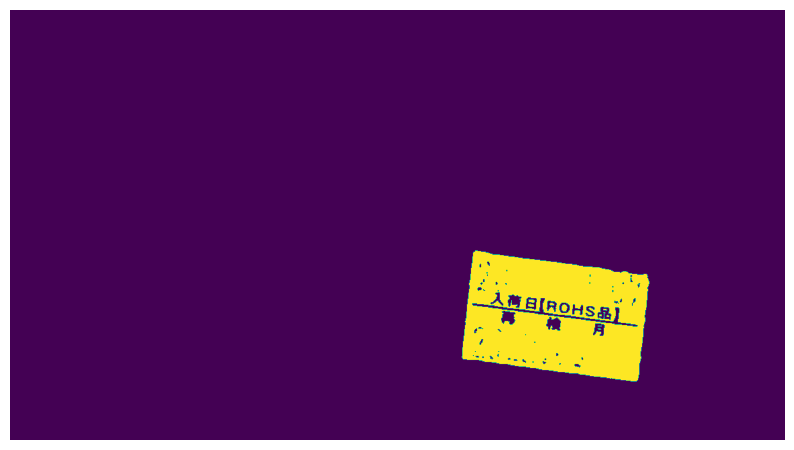

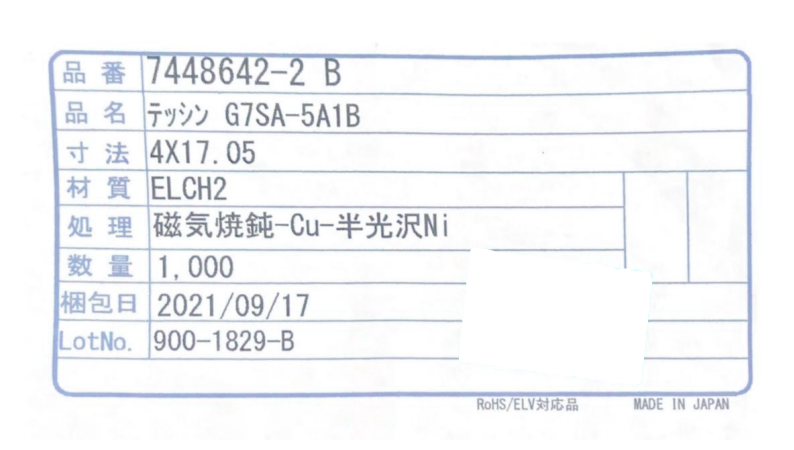

In [7]:
import cv2
import numpy as np

# read image
img = cv2.imread('./images/image2.jpg')

# threshold on yellow
lower=(0,200,200)
upper=(100,255,255)
thresh = cv2.inRange(img, lower, upper)

# apply dilate morphology
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

# get largest contour
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(big_contour)

# draw filled white contour on input 
result = img.copy()
cv2.drawContours(result,[big_contour],0,(255,255,255),-1)

# save cropped image
cv2.imwrite('form_with_label_thresh.png',thresh)
cv2.imwrite('form_with_label_mask.png',mask)
cv2.imwrite('form_with_label_removed.png',result)

cv2.waitKey(0)
cv2.destroyAllWindows()
imshow(thresh)
imshow(result)